# ~ Multi-Arrangement Task Analysis ~

In [1]:
import os, glob
import pandas as pd
from scipy.io import loadmat
import numpy as np
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
from scipy.spatial.distance import squareform
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

In [5]:
work_dir = '/Volumes/GoogleDrive/My Drive/categories_dimensions/subject_data'
os.chdir(work_dir)

## Import multi-arrangement task data 

In [6]:
mat_subj = []
mat_subj2 = []
for file in glob.glob('*.mat'):
    mat_subj.append(file)
for j in mat_subj:
    mat = loadmat(mat_subj[j])
    mat_subj2.append(mat)

#Delete excess spacing for relationship values
relationships=[]
for i in mat['stimuli']:
    delete_spaces = i.replace('  ','')
    delete_spaces = delete_spaces.strip()
    relationships.append(delete_spaces)
    


## Create a distance matrix for relationships

In [30]:
dissim = pd.DataFrame(squareform(mat['rdmutv'][0]), columns=relationships, index=relationships)
count = 0
dissim_dict = {}
for subj in mat_subj[1:]:
    meadows_id2 = subj.split('_')[6]
    temp = pd.DataFrame(squareform(mat['rdmutv'][0]), columns=relationships, index=relationships)
    dissim = dissim + temp
    dissim_dict[meadows_id2] = dissim
    
dissim = dissim.apply(pd.to_numeric)
#dissim = dissim.div(len(mat_subj))

dissim.head()
dissim.max()
dissim_dict['divine-pigeon']




## Make category arrangement RDMs for each subject 

In [38]:
subjects_data = []
for file in glob.glob("*.csv"):
    subjects_data.append(file)  

In [70]:
rdm_r1 = pd.DataFrame(columns=relationships)
meadows_list = []
count = 0
dict_rdms = {}
for subject in subjects_data:
    csv_subj = pd.read_csv(subject).iloc[:, 1:]
    rdm_r1 = pd.DataFrame(columns=relationships)
    for r1_a in relationships:
        cols = [] 
        for col in csv_subj.columns:
            if r1_a in csv_subj[col].tolist():
                cols.append(col)
        for r1_b in relationships:
            if not cols:
                rdm_r1.loc[r1_a,r1_b] = 1
            elif csv_subj[cols].isin([r1_b]).any()[0]:
                rdm_r1.loc[r1_a,r1_b] = 0
            else:
                rdm_r1.loc[r1_a,r1_b] = 1
    meadows_id = subject.split('_')[6]
    dict_rdms[meadows_id] = rdm_r1

## Make dictionary containing averages between category and multi-arrangement plots for each subject 

In [76]:
avgs_dict = {}
for subject in subjects_data:
    meadows_id = subject.split('_')[6]
    df_csv = pd.DataFrame(dict_rdms[meadows_id])
    df_mat = pd.DataFrame(dissim_dict[meadows_id])
    df_concat = pd.concat([df_csv, df_mat])
    #avgs = new_df.mean()
    #pd.DataFrame(avgs)
    mean = df_concat.groupby(level=0).mean()
    avgs_dict[meadows_id] = mean
    lowest = 
    
mean
avgs_dict['holy-grouse']
pd.DataFrame.min(avgs_dict['holy-grouse'])
pd.DataFrame.max(avgs_dict['holy-grouse'])


Wife - Husband                          0.804285
Nurse - Patient                         0.807166
Officer - Soldier                       0.787723
Neighbors                               0.773497
Athletic trainer - Trainee              0.801600
Police officer - Offender               0.771724
Principal - Teacher                     0.756675
Doctor - Nurse                          0.814784
Victim - Criminal                       0.771112
Coach - Athlete                         0.806211
Man - God                               0.766283
Between Half-siblings                   0.764265
Parent - Teenager                       0.776965
Prostitute - Customer                   0.772802
Church members                          0.784023
Foreman - Laborer                       0.740040
Person - Family friends                 0.798761
Person - their Social media follower    0.779918
Guide - Tourist                         0.762928
Bride - Bridesmaid                      0.791640
Teammates in sports 

## Input into MDS

In [80]:
mds = manifold.MDS(n_components=4, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(dissim).embedding_


seed = np.random.RandomState(seed=3)
nmds = manifold.MDS(n_components=4, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(dissim, init=pos)


#Rotate the data
clf = PCA(n_components=4)

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)


## Plot the data of all relationships

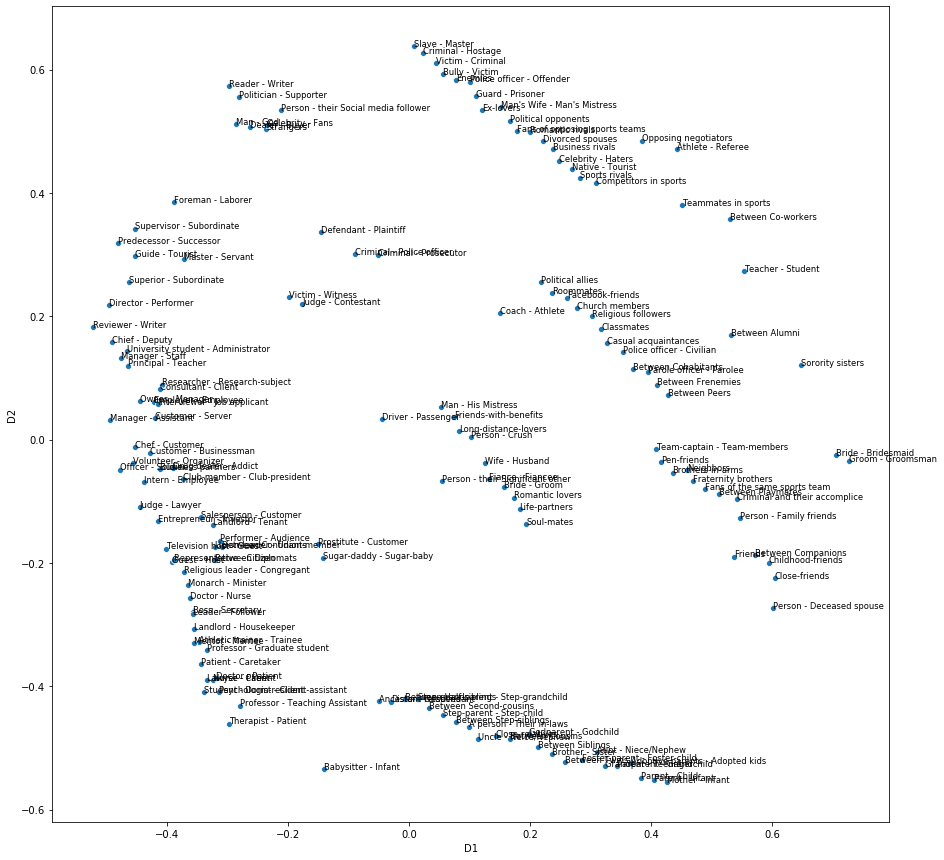

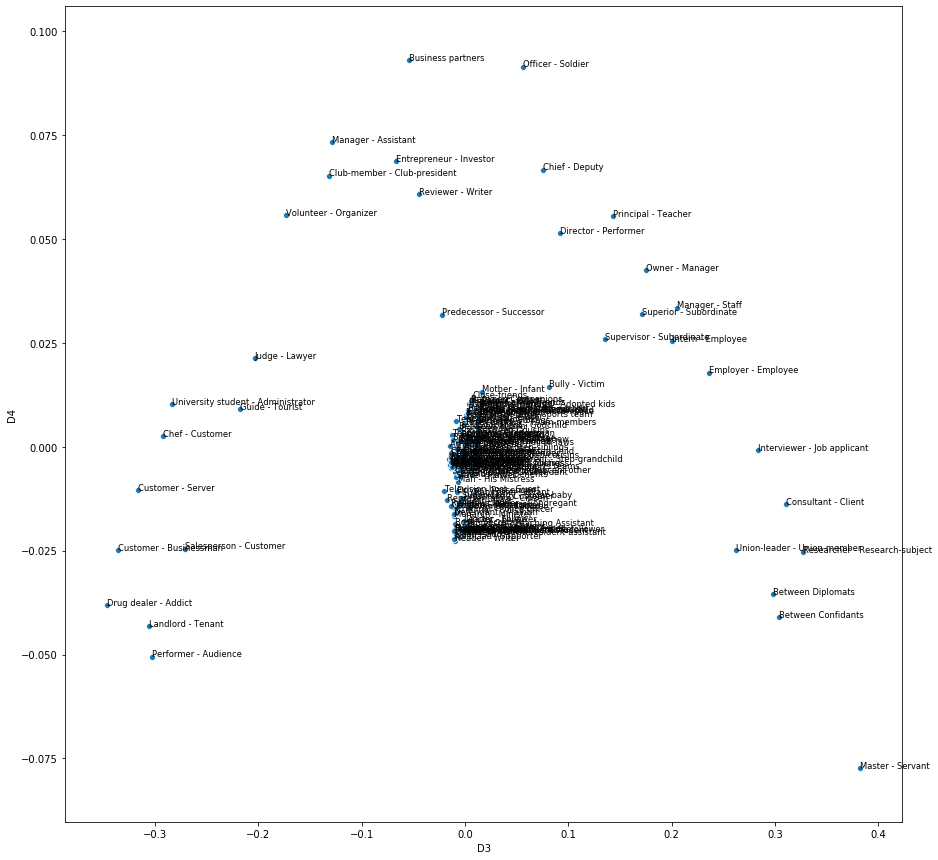

In [81]:
npos_df = pd.DataFrame(npos, columns=['D1','D2','D3','D4'], index=relationships)
npos_df['old_new_comp'] = 0
npos_df.iloc[0:26,-1] = 1

plt.figure(figsize=(15,15))
p1 = sns.scatterplot(x="D1", y="D2", data=npos_df, legend=False)
for line in range(0,159):
     p1.text(npos_df.D1[line], npos_df.D2[line], npos_df.index[line], horizontalalignment='left', size='small')
#plt.savefig("results/mds_scatter_d1_d2.png")

plt.figure(figsize=(15,15))
p1 = sns.scatterplot(x="D3", y="D4", data=npos_df, legend=False)
for line in range(0,159):
     p1.text(npos_df.D3[line], npos_df.D4[line], npos_df.index[line], horizontalalignment='left', size='small')
#plt.savefig("results/mds_scatter_d3_d4.png")